# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

from sklearn import datasets #for loading the dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #KNN-algorithm model
from sklearn.metrics import confusion_matrix

# Loading the Dataset and Data Preprocessing

In [2]:
wine = datasets.load_wine() #loading the wine dataset

In [3]:
df = pd.DataFrame(wine['data'], columns = wine['feature_names']) #arranging the dataset into pandas dataframe
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
df['target'] = wine['target'] #adding target column in the dataframe
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
df.isnull().sum() #checking for null values in the dataframe

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [6]:
df.describe() #checking the statistical measures of the dataframe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# Splitting the DataFrame : 80% (X_train, Y_train) 20% (X_test, Y_test)

In [7]:
#Splitting into Features(X) and Target(Y)
X = df
Y = X.pop('target')

In [8]:
print("X - Shape : ", X.shape)
print("Y - shape : ", Y.shape)

X - Shape :  (178, 13)
Y - shape :  (178,)


In [9]:
Y.unique() #shows the different sets of values present in Y

array([0, 1, 2])

### Splitting into Train(80%) Test(20%) - After tuning for best fit

In [10]:
#80% (X_train, Y_train) 20% (X_test, Y_test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 55)

In [11]:
print("X_train - Shape : ", X_train.shape)
print("Y_train - shape : ", Y_train.shape)
print("X_test - Shape : ", X_test.shape)
print("Y_test - shape : ", Y_test.shape)

X_train - Shape :  (142, 13)
Y_train - shape :  (142,)
X_test - Shape :  (36, 13)
Y_test - shape :  (36,)


# Training the Model by KNN

### Tuning model sensitivity : n_neighbors

In [12]:
k_range = range(1, 30)
scores = []

#checking accuracy score for n_neighbors from range (1-30) to find the best fit, model with highest accuracy
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, Y_train)
    scores.append(knn.score(X_test, Y_test))

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

<IPython.core.display.Javascript object>


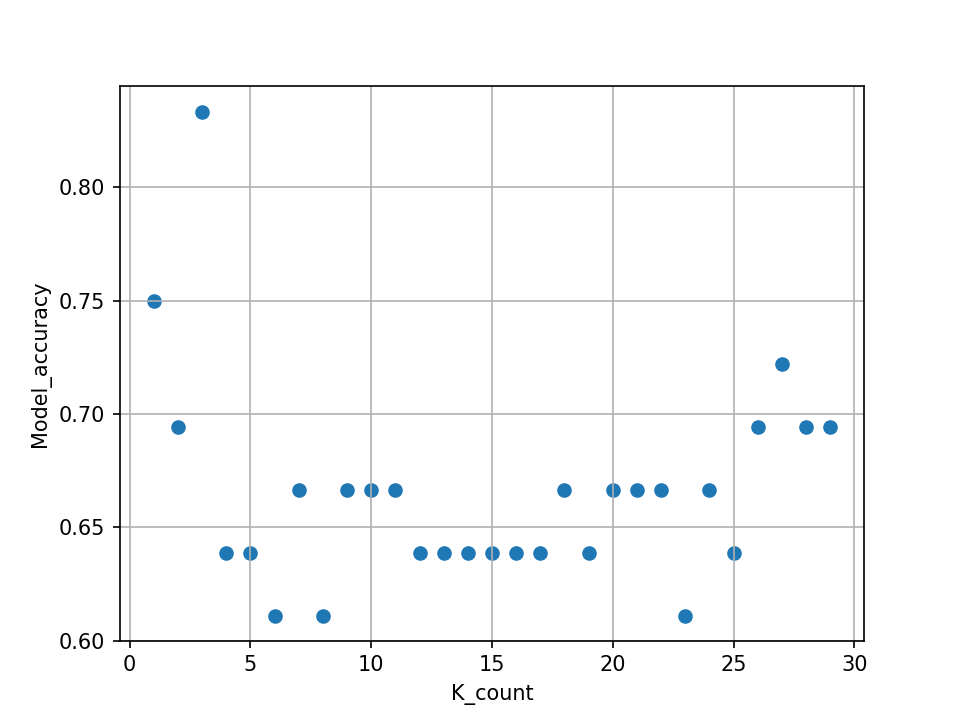

In [13]:
# plotting the scores

plt.figure()
plt.xlabel('K_count')
plt.ylabel('Model_accuracy')
plt.scatter(k_range, scores)
plt.grid()
plt.show()

### Traing the KNN Model

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train) #training the KNN model

KNeighborsClassifier(n_neighbors=3)

In [15]:
knn.score(X_test, Y_test) #testing the accuracy score

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8333333333333334

## Saving the Trained Model

In [16]:
import pickle
filename = 'Wine Classification Model_KNN.train'
pickle.dump(knn, open(filename,'wb'))
#loadMODEL = pickle.load(open('Wine Classification Model_KNN.train','rb')) #loading the saved model

## Making Predictions Using the Model

In [17]:
Predictions = knn.predict(X_test)
Predictions

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2,
       0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2])

In [18]:
cm = confusion_matrix(Y_test, Predictions)
cm

array([[ 8,  0,  0],
       [ 0, 13,  2],
       [ 2,  2,  9]], dtype=int64)

<IPython.core.display.Javascript object>


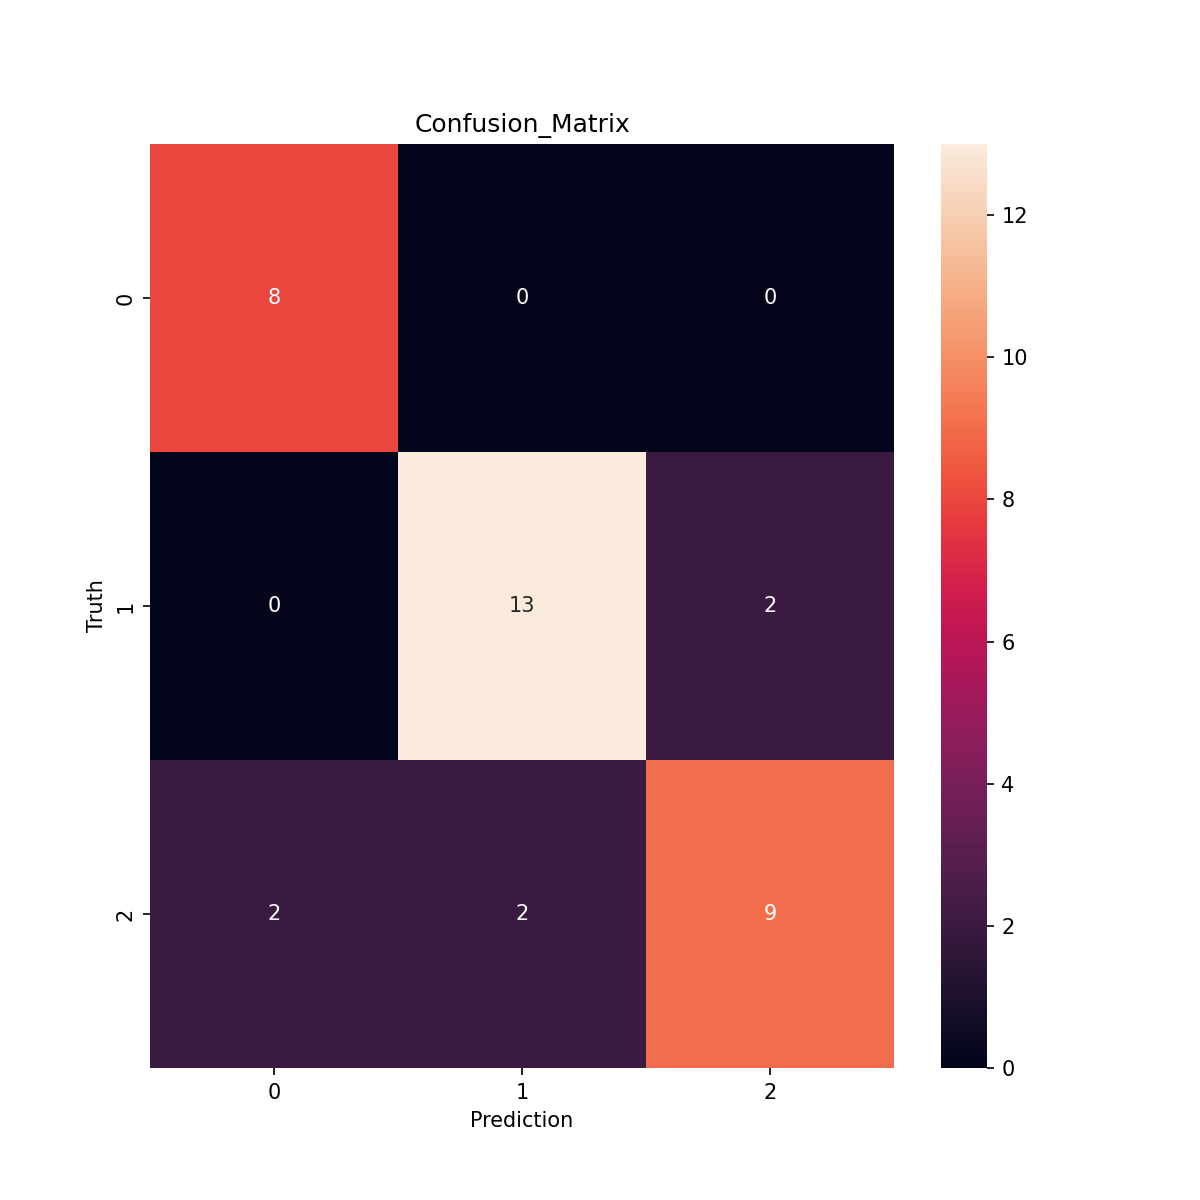

Text(0.5, 58.7222222222222, 'Prediction')

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot = True)
plt.title('Confusion_Matrix')
plt.ylabel('Truth')
plt.xlabel('Prediction')